In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 19.2 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="WCUFcQ9ONfj78nWGV3y4")
project = rf.workspace("ds-oruoc").project("beyblade-nttrl")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.98, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to beyblade-2 in yolov8:: 100%|██████████| 404/404 [00:00<00:00, 4789.24it/s]


In [6]:
!yolo train model=yolov8s.pt data=/content/beyblade-2/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/beyblade-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/beyblade-2/data.yaml

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/beyblade-2/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.29it/s]
                   all         39         78      0.944      0.864      0.936       0.69
              Beyblade         35         67          1          1      0.995       0.88
                  hand          7         11      0.888      0.727      0.876        0.5
Speed: 3.1ms preprocess, 11.7ms inference, 0.0ms loss, 27.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=detect mode=predict conf=0.5 model=/content/runs/detect/train2/weights/best.pt source=/content/beyblade-2/train/images

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/137 /content/beyblade-2/train/images/beyblade_mp4-0001_jpg.rf.651477ac0baefc9bd4fdd1995a623044.jpg: 384x640 2 hands, 41.0ms
image 2/137 /content/beyblade-2/train/images/beyblade_mp4-0003_jpg.rf.fcca81de6f3c3588e390c08cb366d99f.jpg: 384x640 2 hands, 10.7ms
image 3/137 /content/beyblade-2/train/images/beyblade_mp4-0007_jpg.rf.95237ee806749c9e688bf48f03270448.jpg: 384x640 2 hands, 10.6ms
image 4/137 /content/beyblade-2/train/images/beyblade_mp4-0009_jpg.rf.a9a2ec0fd3911807a6678c20d6ffc3df.jpg: 384x640 2 hands, 10.7ms
image 5/137 /content/beyblade-2/train/images/beyblade_mp4-0010_jpg.rf.0357e25c3f80afd5bfd98d7a1a90b34a.jpg: 384x640 2 hands, 10.6ms
image 6/137 /content/beyblade-2/train/images/beyblade_mp4-0011_jpg.rf.fb9eac0f278a34c2a5b30a83cb50ff2b.jpg: 384x640 2 hands, 10.6ms
image 7/137 /content/beyblade-2/train

In [10]:
# Imporing necessary libraries
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
# Locating the latest training directory and reviewing the results:

# Finding the most recent training directory
list_of_files = glob.glob('/content/runs/detect/train2')
latest_dir = max(list_of_files, key=os.path.getctime)

# Loading the results.csv file from the latest directory
results_path = os.path.join(latest_dir, '/content/runs/detect/train2/results.csv')
if os.path.exists(results_path):
    data = pd.read_csv(results_path)
    # Printing the last row of metrics, which represents the final epoch's performance
    print(data.iloc[-1])
else:
    print("Results file not found. Make sure training has completed successfully.")

                  epoch    50.00000
         train/box_loss     0.44521
         train/cls_loss     0.26168
         train/dfl_loss     0.84874
   metrics/precision(B)     0.89632
      metrics/recall(B)     0.86364
       metrics/mAP50(B)     0.87069
    metrics/mAP50-95(B)     0.64110
           val/box_loss     0.66345
           val/cls_loss     0.34231
           val/dfl_loss     0.95457
                 lr/pg0     0.00005
                 lr/pg1     0.00005
                 lr/pg2     0.00005
Name: 49, dtype: float64


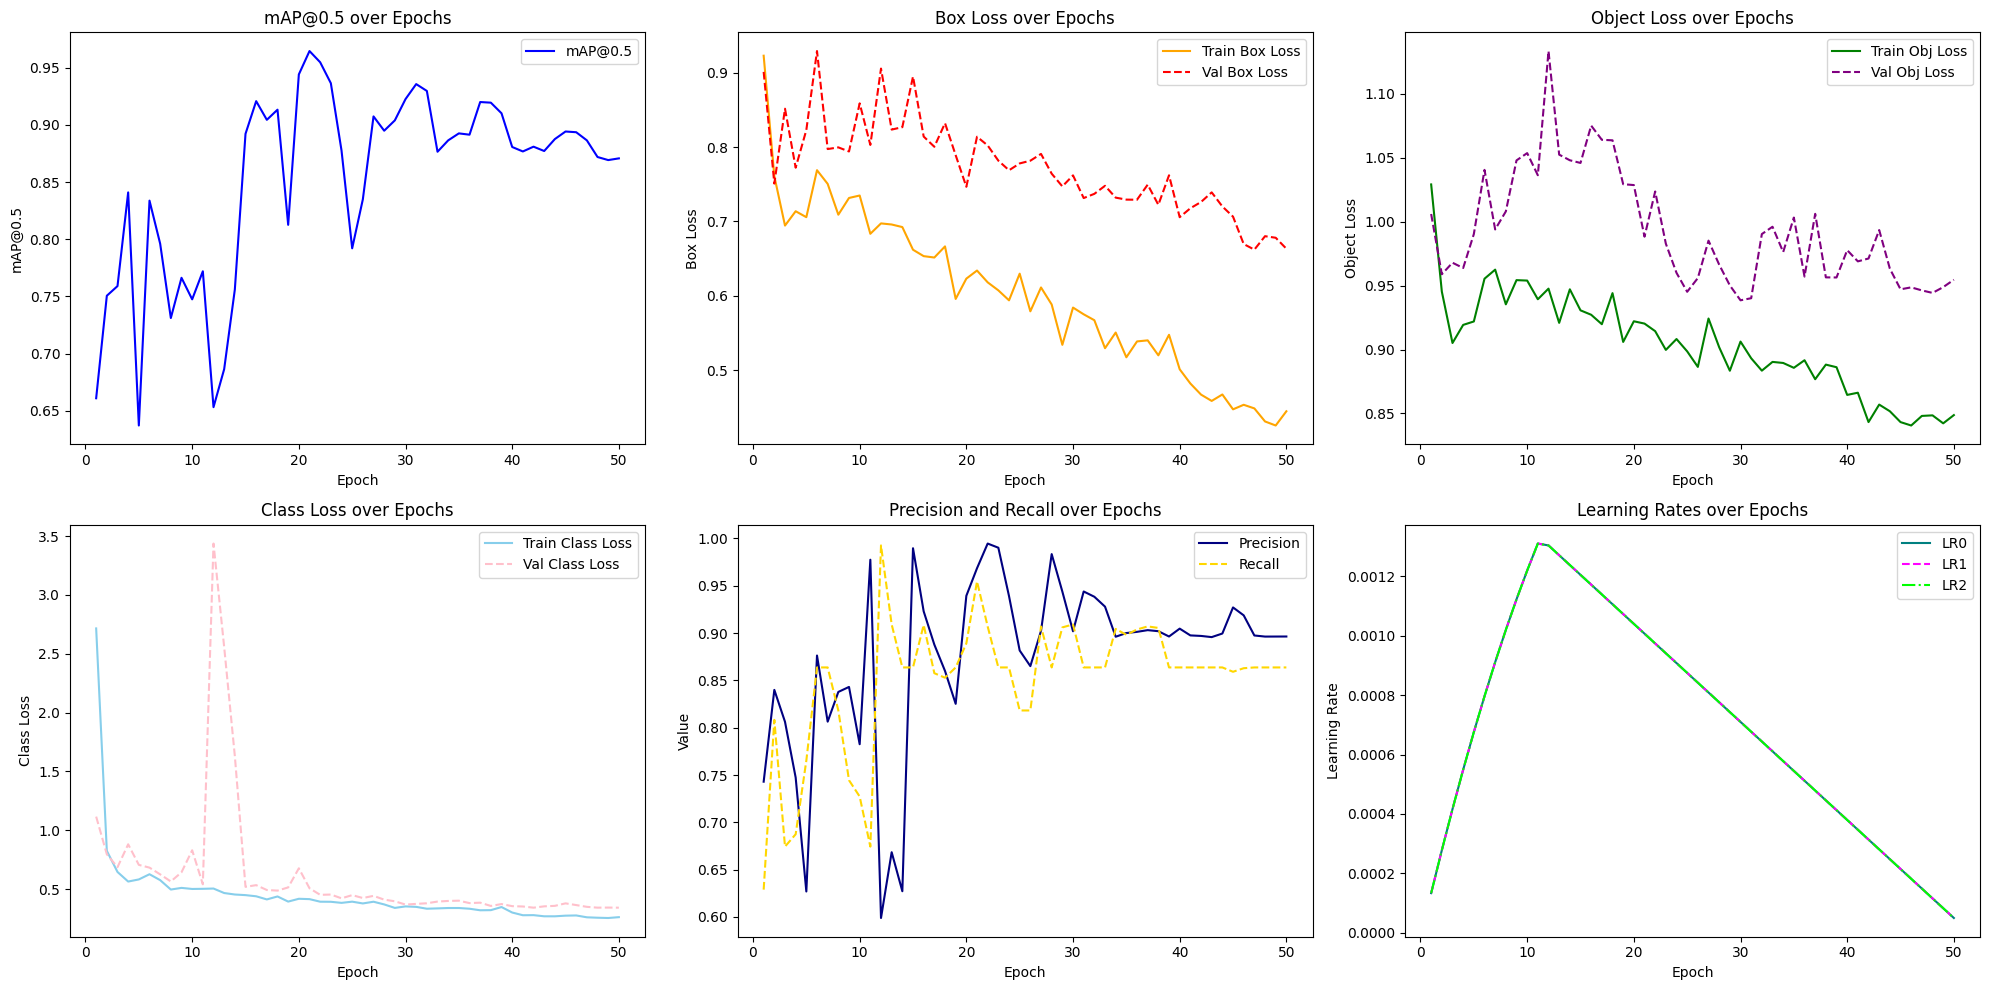

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results and clean column names
results = pd.read_csv('/content/runs/detect/train2/results.csv')
results.columns = results.columns.str.strip()  # Remove extra spaces

# Plotting
plt.figure(figsize=(20, 10))

# Subplot 1: mAP@0.5 over epochs
plt.subplot(2, 3, 1)
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5', color='blue')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('mAP@0.5 over Epochs')
plt.legend()

# Subplot 2: Training and Validation Box Loss
plt.subplot(2, 3, 2)
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='orange')
plt.plot(results['epoch'], results['val/box_loss'], label='Val Box Loss', linestyle='--', color='red')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss over Epochs')
plt.legend()

# Subplot 3: Training and Validation Object Loss
plt.subplot(2, 3, 3)
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train Obj Loss', color='green')  # Assuming 'dfl_loss' is similar to 'obj_loss'
plt.plot(results['epoch'], results['val/dfl_loss'], label='Val Obj Loss', linestyle='--', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Object Loss')
plt.title('Object Loss over Epochs')
plt.legend()

# Subplot 4: Training and Validation Class Loss
plt.subplot(2, 3, 4)
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss', color='skyblue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Val Class Loss', linestyle='--', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss over Epochs')
plt.legend()

# Subplot 5: Precision and Recall
plt.subplot(2, 3, 5)
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision', color='navy')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall', linestyle='--', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Precision and Recall over Epochs')
plt.legend()

# Subplot 6: Learning Rates
plt.subplot(2, 3, 6)
plt.plot(results['epoch'], results['lr/pg0'], label='LR0', color='teal')
plt.plot(results['epoch'], results['lr/pg1'], label='LR1', linestyle='--', color='magenta')
plt.plot(results['epoch'], results['lr/pg2'], label='LR2', linestyle='-.', color='lime')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
